<div style="border:solid Chocolate 2px; padding: 40px">

<b> Татьяна, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<div class="alert alert-info">


Привет, Алексей. Спасибо за проверку. Можем общаться на "ты" 😊
</div>


# Анализ лояльности пользователей Яндекс Афиши

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [62]:
#импортируем
!pip install phik

In [63]:
from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [64]:
# готовим подключение через SQLAlchemy
import pandas as pd
from sqlalchemy import create_engine
db_config = {
    'user': 'praktikum_student',
    'pwd': 'Sdf4$2;d-d30pp',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-analyst-afisha'
}

# Строка подключения к PostgreSQL
connection_string = (
    f"postgresql://{db_config['user']}:{db_config['pwd']}"
    f"@{db_config['host']}:{db_config['port']}/{db_config['db']}"
    f"?sslmode=require"
)

engine = create_engine(connection_string)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали, коннектор сделали - отлично!

In [6]:
query = """
WITH set_config_precode AS (
    SELECT set_config('synchronize_seqscans', 'off', true)
),

orders_extended AS (
    SELECT
        p.user_id,
        p.device_type_canonical,
        p.order_id,
        p.created_dt_msk AS order_dt,
        p.created_ts_msk AS order_ts,
        p.currency_code,
        p.revenue,
        p.tickets_count,
        p.event_id,
        p.service_name,
        e.event_type_main,
        c.city_name,
        r.region_name,
        LAG(p.created_dt_msk::date) OVER (
            PARTITION BY p.user_id
            ORDER BY p.created_dt_msk
        ) AS prev_order_dt
    FROM afisha.purchases p
    JOIN afisha.events e
        ON p.event_id = e.event_id
    JOIN afisha.city c
        ON e.city_id = c.city_id
    JOIN afisha.regions r
        ON c.region_id = r.region_id
    WHERE
        p.device_type_canonical IN ('mobile', 'desktop')
        AND e.event_type_main <> 'фильм'
)

SELECT
    user_id,
    device_type_canonical,
    order_id,
    order_dt,
    order_ts,
    currency_code,
    revenue,
    tickets_count,
    (order_dt::date - prev_order_dt) AS days_since_prev,
    event_id,
    service_name,
    event_type_main,
    region_name,
    city_name
FROM orders_extended
ORDER BY user_id;
"""


In [7]:
df = pd.read_sql(query, con=engine)

# на всякий случай посмотрим, что всё ок:
display(df.shape)
df.head()


(290611, 14)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные выгружены из базы.

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [8]:
df.info()
df.describe(include='all')
df.isna().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

/tmp/ipykernel_31/1607607201.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
/tmp/ipykernel_31/1607607201.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк


В результате выгрузки данных из базы data-analyst-afisha получено 290 611 строк и 14 колонок. Структура датафрейма соответствует требованиям задачи. Все ключевые признаки, включая информацию о заказах, пользователях, типах мероприятий и географии, успешно загружены.

Типы данных в целом корректны: поля order_dt и order_ts уже представлены в формате datetime64, показатели выручки и количества билетов имеют числовой тип. Идентификаторы пользователей и справочные поля хранятся в виде строковых значений, что также корректно.

Пропуски наблюдаются только в колонке days_since_prev (около 7.6% строк). Это ожидаемая ситуация для пользователей с единственной покупкой, поэтому пропуски не требуют удаления.

На этапе предобработки планируется:

сохранить идентификаторы в строковом формате;

при необходимости привести категориальные признаки (device_type_canonical, service_name, event_type_main, region_name, city_name) к типу category;

проверить корректность значений days_since_prev и отсутствие отрицательных интервалов.

В целом данные загружены корректно, структура датафрейма готова к дальнейшему анализу.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные изучены, намечены шаги по их обработке.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [9]:
#загружаем курс рубль-тенге
import pandas as pd

url_tenge = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'
tenge_rate_df = pd.read_csv(url_tenge)

tenge_rate_df.head()
tenge_rate_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [10]:
#готовим датафрейм с курсом
import pandas as pd
import numpy as np

url_tenge = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'
tenge_rate_df = pd.read_csv(url_tenge)

# переименуем колонку даты и приведём её к типу date
tenge_rate_df.rename(columns={'data': 'order_date'}, inplace=True)
tenge_rate_df['order_date'] = pd.to_datetime(tenge_rate_df['order_date']).dt.date

tenge_rate_df.head()


,order_date,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [11]:
df['order_date'] = df['order_dt'].dt.date

In [12]:
#мерджим курс в основной датафрейм
df = df.merge(
    tenge_rate_df[['order_date', 'nominal', 'curs', 'cdx']],
    on='order_date',
    how='left'
)

In [13]:
# на всякий случай приведём код валюты к верхнему регистру
df['currency_code'] = df['currency_code'].str.upper()

# базово: для рублёвых заказов выручка уже в рублях
df['revenue_rub'] = df['revenue']

# маска для заказов в тенге
mask_kzt = df['currency_code'] == 'KZT'

df.loc[mask_kzt, 'revenue_rub'] = (
    df.loc[mask_kzt, 'revenue'] * df.loc[mask_kzt, 'curs'] / df.loc[mask_kzt, 'nominal']
)

In [14]:
df[['order_date', 'currency_code', 'revenue', 'curs', 'nominal', 'revenue_rub']].head(10)

,order_date,currency_code,revenue,curs,nominal,revenue_rub
0,2024-08-20,RUB,1521.94,18.6972,100,1521.94
1,2024-07-23,RUB,289.45,18.3419,100,289.45
2,2024-10-06,RUB,1258.57,19.6475,100,1258.57
3,2024-07-13,RUB,8.49,18.5010,100,8.49
4,2024-10-04,RUB,1390.41,19.6648,100,1390.41
5,2024-10-23,RUB,902.74,20.0531,100,902.74
6,2024-08-15,RUB,917.83,18.7730,100,917.83
7,2024-09-29,RUB,47.78,19.3741,100,47.78
8,2024-10-15,RUB,74.84,19.7185,100,74.84
9,2024-06-20,RUB,1421.91,18.0419,100,1421.91


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выручка приведена к единой валюте.

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [15]:
#проверим данные на пропущенные значения
df.isna().sum()
df.isna().mean().round(4)

user_id                  0.0000
device_type_canonical    0.0000
order_id                 0.0000
order_dt                 0.0000
order_ts                 0.0000
currency_code            0.0000
revenue                  0.0000
tickets_count            0.0000
days_since_prev          0.0755
event_id                 0.0000
service_name             0.0000
event_type_main          0.0000
region_name              0.0000
city_name                0.0000
order_date               0.0000
nominal                  0.0000
curs                     0.0000
cdx                      0.0000
revenue_rub              0.0000
dtype: float64

In [16]:
df[df['revenue_rub'].isna()].head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,order_date,nominal,curs,cdx,revenue_rub


In [17]:
#немного оптимизируем по памяти

# идентификаторы — строки
df['user_id'] = df['user_id'].astype(str)
df['order_id'] = df['order_id'].astype(str)
df['event_id'] = df['event_id'].astype(str)

# числовые — компактнее
df['tickets_count'] = pd.to_numeric(df['tickets_count'], downcast='integer')
df['revenue'] = pd.to_numeric(df['revenue'], downcast='float')
df['revenue_rub'] = pd.to_numeric(df['revenue_rub'], downcast='float')
df['days_since_prev'] = pd.to_numeric(df['days_since_prev'], downcast='float')


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Типы данных оптимизированы.

In [18]:
#проверка значений в ключевых категориальных столбцах
cat_cols = [
    'device_type_canonical',
    'currency_code',
    'service_name',
    'event_type_main',
    'region_name',
    'city_name'
]

for col in cat_cols:
    print(f'\n{col}')
    print(df[col].value_counts(dropna=False).head(15))



device_type_canonical
mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

currency_code
RUB    285542
KZT      5069
Name: currency_code, dtype: int64

service_name
Билеты без проблем        63519
Лови билет!               41124
Билеты в руки             40343
Мой билет                 34839
Облачко                   26642
Лучшие билеты             17774
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Name: service_name, dtype: int64

event_type_main
концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

region_name
Каменевский регион         91058
Североярская область       44049
Широковская область        164

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Категориальные признаки проверены на предмет аномалий.

In [19]:
#Проверка распределения численных данных + выбросы
df[['revenue_rub', 'tickets_count', 'days_since_prev']].describe(
    percentiles=[0.5, 0.9, 0.95, 0.99]
)

,revenue_rub,tickets_count,days_since_prev
count,290611.000000,290611.000000,268678.000000
mean,555.572083,2.754311,3.222381
std,875.498169,1.170620,11.350510
min,-90.760002,1.000000,0.000000
50%,351.140015,3.000000,0.000000
90%,1294.770020,4.000000,7.000000
95%,1630.650024,5.000000,18.000000
99%,2628.421631,6.000000,63.000000
max,81174.539062,57.000000,148.000000


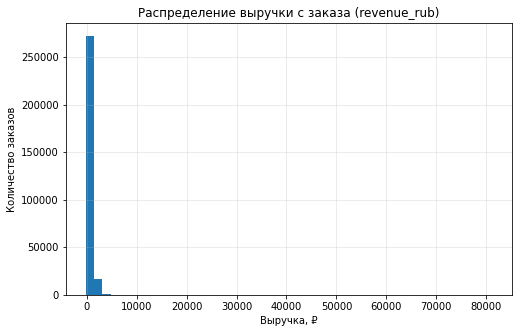

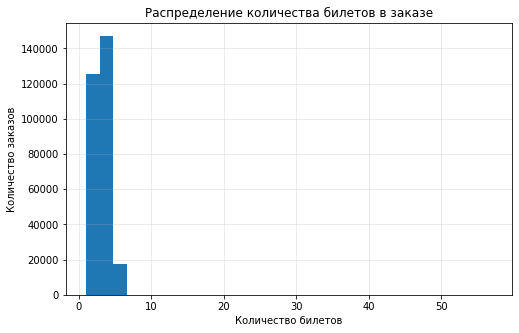

In [21]:
import matplotlib.pyplot as plt

# Гистограмма выручки
plt.figure(figsize=(8, 5))
plt.hist(df['revenue_rub'], bins=50)
plt.title('Распределение выручки с заказа (revenue_rub)')
plt.xlabel('Выручка, ₽')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.3)
plt.show()

# Гистограмма количества билетов
plt.figure(figsize=(8, 5))
plt.hist(df['tickets_count'], bins=30)
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.3)
plt.show()


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не забывай подписывать оси на графиках - тут и далее. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать - это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.

<div class="alert alert-info">


Поправила
</div>


In [22]:
#фильтрация выбросов по 99-му перцентилю для revenue_rub
p99_revenue = df['revenue_rub'].quantile(0.99)
p99_revenue

2628.421630859375

In [23]:
df_before = df.copy()

df = df[df['revenue_rub'] <= p99_revenue]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Численные признаки проверены на предмет аномалий, удалены выбросы.

In [24]:
removed_rows = len(df_before) - len(df)
removed_share = removed_rows / len(df_before)

print('Удалено строк:', removed_rows)
print('Доля удалённых строк:', round(removed_share * 100, 2), '%')

Удалено строк: 2825
Доля удалённых строк: 0.97 %


***Промежуточный вывод по предобработке данных***

**Приведение выручки к рублям**

Для заказов в тенге был загружен датасет с курсами валют.
Для корректного объединения с ним создан новый столбец order_date (дата без времени).
После объединения в таблицу добавились технические столбцы nominal, curs, cdx, использованные для расчёта нового показателя revenue_rub, отражающего выручку в российских рублях.
Для заказов в рублях revenue_rub совпадает с исходной выручкой.

**Пропуски**

Пропуски обнаружены только в days_since_prev, что ожидаемо для пользователей с единственной покупкой. В остальных столбцах пропусков нет.

**Типы данных**

Идентификаторы приведены к строковому типу, даты — к datetime64, числовые значения оптимизированы. Новый столбец order_date используется только для соединения с курсами валют.

**Категориальные признаки**

Все категориальные значения корректны; искусственно закодированных пропусков не выявлено. Нормализация не потребовалась.

**Числовые данные и выбросы**

Обнаружены отрицательные и аномально большие значения revenue_rub.
Отрицательные значения удалены. Далее по условию задания были удалены выбросы выше 99-го перцентиля (2628.42 руб.).

Удалено 2825 строк (0.97% данных), что не влияет на репрезентативность выборки.

**Итог**


Датасет успешно очищен, выручка приведена к единой валюте, а новые столбцы (order_date, revenue_rub) корректно сформированы. Данные полностью готовы к дальнейшему анализу пользовательского поведения и расчёту продуктовых метрик.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть вывод по результатам обработки данных с оценкой потерь.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [25]:
#сортируем данные по времени соверщения заказа
df = df.sort_values(by=['user_id', 'order_ts'])

Для каждого user_id вычисляем:

first_order_dt — дата первого заказа

last_order_dt — дата последнего заказа

first_device — устройство первого заказа

first_region — регион первого заказа

first_service — билетный партнёр первого заказа

first_event_type — жанр первого посещённого мероприятия

total_orders — количество заказов

avg_revenue_rub — средняя выручка с заказа в рублях

avg_tickets — среднее число билетов

avg_days_between_orders — среднее время между заказами

In [26]:
# 1. Дата первого и последнего заказа
user_profile = df.groupby('user_id').agg(
    first_order_dt=('order_dt', 'min'),
    last_order_dt=('order_dt', 'max'),
)

# 2. Данные из первого заказа
first_orders = df.groupby('user_id').first()

user_profile['first_device'] = first_orders['device_type_canonical']
user_profile['first_region'] = first_orders['region_name']
user_profile['first_service'] = first_orders['service_name']
user_profile['first_event_type'] = first_orders['event_type_main']

# 3. Количество заказов и средние метрики
user_profile['total_orders'] = df.groupby('user_id')['order_id'].count()
user_profile['avg_revenue_rub'] = df.groupby('user_id')['revenue_rub'].mean()
user_profile['avg_tickets'] = df.groupby('user_id')['tickets_count'].mean()

# 4. Среднее время между заказами
user_profile['avg_days_between_orders'] = (
    df.groupby('user_id')['days_since_prev'].mean()
)

# 5. Бинарные признаки
user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype(int)
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype(int)

user_profile.head()

,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets,avg_days_between_orders,is_two,is_five
user_id,,,,,,,,,,,,
0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.939941,4.000000,NaN,0,0
0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010010,3.000000,75.0,1,0
000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213318,2.666667,51.0,1,0
00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830017,4.000000,NaN,0,0
000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.309998,1.500000,16.0,1,0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Профиль пользователя собран, признаки добавлены.

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [27]:
#базовые метрики по пользователям
# 1. Общее число пользователей
total_users = user_profile.shape[0]

# 2. Средняя выручка с заказа (берём среднюю по пользователям)
avg_revenue_per_order = user_profile['avg_revenue_rub'].mean()

# 3. Доля пользователей с ≥2 заказами
share_two_plus = user_profile['is_two'].mean()

# 4. Доля пользователей с ≥5 заказами
share_five_plus = user_profile['is_five'].mean()

print("Общее число пользователей:", total_users)
print("Средняя выручка с одного заказа:", avg_revenue_per_order)
print("Доля пользователей с ≥2 заказами:", share_two_plus)
print("Доля пользователей с ≥5 заказами:", share_five_plus)


Общее число пользователей: 21854
Средняя выручка с одного заказа: 544.3981
Доля пользователей с ≥2 заказами: 0.6170952686007138
Доля пользователей с ≥5 заказами: 0.2900613160062231


**Статистика по ключевым пользовательским характеристикам**

In [28]:
#по общему числу заказов
user_profile['total_orders'].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

count    21854.000000
mean        13.168573
std        121.674800
min          1.000000
50%          2.000000
90%         15.000000
95%         31.350000
99%        152.000000
max      10181.000000
Name: total_orders, dtype: float64

**Аномалии:**

 медиана: 2,  90-й перцентиль: 15,  95-й перцентиль: 31, 99-й перцентиль: 152,  максимум: 10 181

Тут явно видно: «нормальные» пользователи — до нескольких десятков заказов, а значения в тысячи заказов — аномалия (корпоративы/партнёры/ошибки).

Вывод: нужно отфильтровать по 99-му перцентилю (152 заказа).

In [29]:
#по среднему числу билетов
user_profile['avg_tickets'].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

count    21854.000000
mean         2.743129
std          0.913080
min          1.000000
50%          2.750000
90%          4.000000
95%          4.000000
99%          5.000000
max         11.000000
Name: avg_tickets, dtype: float64

**Аномалии:** 

медиана: 2.75, 
99-й перцентиль: 5, 
максимум: 11

11 билетов — много, но реалистично для группы людей.

Вывод: аномалий нет, не фильтруем.

In [30]:
#по среднему количеству дней между покупками
user_profile['avg_days_between_orders'].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

count    13513.000000
mean        15.851275
std         22.306225
min          0.000000
50%          8.000000
90%         41.500000
95%         61.500000
99%        112.000000
max        148.000000
Name: avg_days_between_orders, dtype: float64

**Аномалии**

медиана: 8 дней, 
99-й перцентиль: 112, 
максимум: 148

Это просто редкие, нечасто возвращающиеся пользователи.

Вывод: аномалий нет, не фильтруем.

**Вывод по аномалиям**

Принятое решение по обработке аномалий

Для уменьшения влияния экстремальных значений по числу заказов было принято решение удалить пользователей, чьё значение total_orders превышает 99-й перцентиль (152 заказа). Это позволит исключить редко встречающиеся аномальные наблюдения, не уменьшая существенно объём выборки.

In [31]:
#фильтруем по 99-му перцентилю total_orders

# 99-й перцентиль по общему числу заказов
p99_orders = user_profile['total_orders'].quantile(0.99)
print('99-й перцентиль по числу заказов:', p99_orders)

# фильтрация аномальных пользователей
user_profile_filtered = user_profile[user_profile['total_orders'] <= p99_orders]

removed_users = len(user_profile) - len(user_profile_filtered)
removed_share = removed_users / len(user_profile)

print('Удалено пользователей:', removed_users)
print('Доля удалённых пользователей:', round(removed_share * 100, 2), '%')

# пересчёт статистик по обновлённому датасету
user_profile_filtered[['total_orders', 'avg_tickets', 'avg_days_between_orders']].describe(
    percentiles=[0.5, 0.9, 0.95, 0.99]
)


99-й перцентиль по числу заказов: 152.0
Удалено пользователей: 216
Доля удалённых пользователей: 0.99 %


,total_orders,avg_tickets,avg_days_between_orders
count,21638.000000,21638.000000,13297.000000
mean,6.501294,2.743319,16.101315
std,14.324031,0.917486,22.399511
min,1.000000,1.000000,0.000000
50%,2.000000,2.750000,8.352942
90%,14.000000,4.000000,42.000000
95%,26.000000,4.000000,62.000000
99%,80.000000,5.000000,113.000000
max,152.000000,11.000000,148.000000


**Вывод по фильтрации**

Удалено пользователей: 216

Доля удалённых пользователей: 0.99%

Таким образом, после очистки в выборке осталось 21 638 пользователей, что по-прежнему обеспечивает достаточную репрезентативность данных.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Статистики по профилю изучены.

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [34]:
#подсчитываем распределения
def segment_stats(df, column):
    seg = df[column].value_counts().reset_index()
    seg.columns = [column, "users"]
    seg["share"] = df[column].value_counts(normalize=True).values
    return seg

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для небинарных признаков доли удобнее считать с помощью `value_counts(normalize=True)`.

<div class="alert alert-info">


Поправила
</div>

In [40]:
#распределения по каждому признаку
event_type_seg = segment_stats(user_profile_filtered, "first_event_type")
device_seg = segment_stats(user_profile_filtered, "first_device")
region_seg = segment_stats(user_profile_filtered, "first_region")
service_seg = segment_stats(user_profile_filtered, "first_service")


print("Распределение по первому жанру:")
display(event_type_seg)

print("\nРаспределение по первому устройству:")
display(device_seg)

print("\nТОП-10 регионов по числу пользователей:")
display(region_seg.head(10))

print("\nТОП-10 билетных партнёров по числу пользователей:")
display(service_seg.head(10))

Распределение по первому жанру:


,first_event_type,users,share
0,концерты,9560,0.441815
1,другое,5426,0.250763
2,театр,4239,0.195905
3,стендап,1110,0.051299
4,спорт,794,0.036695
5,выставки,414,0.019133
6,ёлки,95,0.004390



Распределение по первому устройству:


,first_device,users,share
0,mobile,17924,0.828358
1,desktop,3714,0.171642



ТОП-10 регионов по числу пользователей:


,first_region,users,share
0,Каменевский регион,7085,0.327433
1,Североярская область,3767,0.174092
2,Широковская область,1224,0.056567
3,Озернинский край,675,0.031195
4,Малиновоярский округ,525,0.024263
5,Шанырский регион,500,0.023107
6,Травяная область,488,0.022553
7,Светополянский округ,457,0.021120
8,Речиновская область,440,0.020335
9,Яблоневская область,411,0.018994



ТОП-10 билетных партнёров по числу пользователей:


,first_service,users,share
0,Билеты без проблем,5186,0.239671
1,Мой билет,2969,0.137212
2,Лови билет!,2809,0.129818
3,Билеты в руки,2559,0.118264
4,Облачко,2177,0.100610
5,Весь в билетах,1285,0.059386
6,Лучшие билеты,1184,0.054719
7,Прачечная,583,0.026943
8,Край билетов,454,0.020982
9,Дом культуры,356,0.016453


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> При анализе высокочастотных категорий следует выводить ТОП-10 или ТОП-15 значений, чтобы анализ был более фокусным.

<div class="alert alert-info">


Поправила
</div>

**Вывод**

In [28]:
#выведем долю в процентах для удобства
event_type_seg['share_pct'] = (event_type_seg['share'] * 100).round(1)

print("Распределение по первому жанру:")
display(event_type_seg[['first_event_type', 'users', 'share_pct']])


Распределение по первому жанру:


,first_event_type,users,share_pct
0,концерты,9560,44.2
1,другое,5426,25.1
2,театр,4239,19.6
3,стендап,1110,5.1
4,спорт,794,3.7
5,выставки,414,1.9
6,ёлки,95,0.4


Концерты — ключевая точка входа (44% всех пользователей).
Затем идут категории «Другое» и театр.
Остальные жанры дают значительно меньший поток новых пользователей.

In [29]:
#переводим в проценты
device_seg['share_pct'] = (device_seg['share'] * 100).round(1)

print("Распределение по первому устройству:")
display(device_seg[['first_device', 'users', 'share_pct']])


Распределение по первому устройству:


,first_device,users,share_pct
0,mobile,17924,82.8
1,desktop,3714,17.2


Распределение резко смещено в сторону мобильных устройств.
Почти 83% пользователей впервые приходят через смартфон, что делает мобильный канал главным воронкой привлечения.

In [30]:
#переводим в проценты
region_seg['share_pct'] = (region_seg['share'] * 100).round(2)

print("Распределение по региону первого заказа:")
display(region_seg[['first_region', 'users', 'share_pct']])



Распределение по региону первого заказа:


,first_region,users,share_pct
0,Каменевский регион,7085,32.74
1,Североярская область,3767,17.41
2,Широковская область,1224,5.66
3,Озернинский край,675,3.12
4,Малиновоярский округ,525,2.43
...,...,...,...
76,Тихогорская область,2,0.01
77,Светолесский край,2,0.01
78,Верхозёрский край,1,0.00
79,Сосноводолинская область,1,0.00


Для регионов лучше округлять до двух знаков, потому что в длинном хвосте доли очень маленькие (0.0001 → 0.01%).

Распределение пользователей по регионам сильно сконцентрировано.
Три крупнейших региона — Каменевский (32.7%), Североярская область (17.4%) и Широковская область (5.7%) — вместе дают более 55% всех первых заказов.

Далее идет группа средних регионов с долями 2–3%, а оставшиеся 70+ регионов формируют длинный хвост с минимальным вкладом (многие — менее 0.1%).

Таким образом, привлечение новых пользователей практически целиком сосредоточено в нескольких крупных регионах, в то время как большинство регионов дают единичные заказы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут анализ фактически отсутствует - стоит добавить выводы по сути данных.

<div class="alert alert-info">


Поправила
</div>

In [31]:
service_seg['share_pct'] = (service_seg['share'] * 100).round(2)

print("Распределение по первому билетному партнёру:")
display(service_seg[['first_service', 'users', 'share_pct']])

Распределение по первому билетному партнёру:


,first_service,users,share_pct
0,Билеты без проблем,5186,23.97
1,Мой билет,2969,13.72
2,Лови билет!,2809,12.98
3,Билеты в руки,2559,11.83
4,Облачко,2177,10.06
5,Весь в билетах,1285,5.94
6,Лучшие билеты,1184,5.47
7,Прачечная,583,2.69
8,Край билетов,454,2.10
9,Дом культуры,356,1.65


Пять крупнейших билетных операторов приводят более 70% всех новых пользователей.
Особенно выделяется «Билеты без проблем» — почти четверть всех первых заказов.

Длинный хвост партнёров существует, но его вклад минимальный.

**Общий вывод:**
    
Распределение пользователей по признакам первого заказа неравномерное — на платформе есть выраженные точки входа.
Основной поток формируют:

жанры: концерты (44%) — ключевой источник новых пользователей;

устройства: мобильные телефоны (83%);

регионы: несколько крупных регионов (основной — Каменевский, 33%);

партнёры: первые 5 билетных сервисов дают более 70% заказов.

Большинство остальных категорий имеют малую долю и формируют длинный хвост.
Таким образом, новые пользователи приходят преимущественно через ограниченный набор жанров, устройств, регионов и партнёров, что важно учитывать при анализе возвратности.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты полноценно выполнила задачу: разложила пользователей по всем нужным признакам, посчитала доли, показала длинный хвост, выделила наиболее крупные сегменты. Видно, что ты последовательно прошлась по каждому требуемому разрезу: жанр, устройство, регион, партнёр. Выводы по устройствам, жанрам и партнёрам совпадают с данными и логично объяснены. Точки входа выделены корректно, общий вывод связан с наблюдениями.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> При описании результатов местами есть лёгкие смещения в формулировках. Например, упоминание про несколько крупнейших операторов, которые обеспечивают основной поток клиентов, соответствует данным, но можно уточнить, что именно первые пять дают свыше 70%, чтобы подчеркнуть масштаб.
        
Также в блоке с регионами ты опираешься на значение около трети от всех первых заказов - это соответствует данным, но можно чуть точнее обозначить, что округляла до двух знаков, чтобы избежать впечатления чрезмерной точности.
В некоторых местах можно сильнее связать наблюдение с выводом. Например, в секции про жанры ты правильно выделяешь ведущие категории, но можно пояснить, что суммарно они покрывают значительную часть трафика и формируют основу первичного спроса.

<div class="alert alert-info">


Поправила
</div>

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [45]:
#напишем функцию для анализа возвратов по сегменту
def return_rate_by_segment(df, column):
    seg = (
        df.groupby(column)
        .agg(
            users=('is_two', 'count'),
            returning=('is_two', 'mean')  # доля пользователей с >= 2 заказами
        )
        .sort_values('users', ascending=False)
    )
    seg['returning_pct'] = (seg['returning'] * 100).round(1)
    return seg

Делаем анализ по каждому признаку первого заказа:

In [46]:
#по типу первого мероприятия
event_return = return_rate_by_segment(user_profile_filtered, "first_event_type")
event_return

,users,returning,returning_pct
first_event_type,,,
концерты,9560,0.618305,61.8
другое,5426,0.596203,59.6
театр,4239,0.633876,63.4
стендап,1110,0.609009,60.9
спорт,794,0.557935,55.8
выставки,414,0.640097,64.0
ёлки,95,0.557895,55.8


In [47]:
#по типу устройства
device_return = return_rate_by_segment(user_profile_filtered, "first_device")
device_return

,users,returning,returning_pct
first_device,,,
mobile,17924,0.608123,60.8
desktop,3714,0.638126,63.8


In [48]:
#по региону первого заказа(топ 10)
region_return = return_rate_by_segment(user_profile_filtered, "first_region")
region_return_top10 = region_return.head(10)
region_return_top10

,users,returning,returning_pct
first_region,,,
Каменевский регион,7085,0.623994,62.4
Североярская область,3767,0.638174,63.8
Широковская область,1224,0.645425,64.5
Озернинский край,675,0.552593,55.3
Малиновоярский округ,525,0.560000,56.0
Шанырский регион,500,0.672000,67.2
Травяная область,488,0.614754,61.5
Светополянский округ,457,0.656455,65.6
Речиновская область,440,0.634091,63.4


In [49]:
#по первому билетному оператору(топ 10)
service_return = return_rate_by_segment(user_profile_filtered, "first_service")
service_return_top10 = service_return.head(10)
service_return_top10

,users,returning,returning_pct
first_service,,,
Билеты без проблем,5186,0.604126,60.4
Мой билет,2969,0.608622,60.9
Лови билет!,2809,0.609114,60.9
Билеты в руки,2559,0.627198,62.7
Облачко,2177,0.612770,61.3
Весь в билетах,1285,0.628794,62.9
Лучшие билеты,1184,0.612331,61.2
Прачечная,583,0.626072,62.6
Край билетов,454,0.651982,65.2


Визуализируем по регионам и партнерам (топ 10)

In [54]:
#def plot_return_rate(df, title):
 #   df_sorted = df.sort_values('returning_pct') 
 #   plt.figure(figsize=(10, 5))
 #   plt.bar(df_sorted.index, df_sorted['returning_pct'])
 #   plt.xticks(rotation=45, ha='right')
 #   plt.ylabel("Доля возвратов (%)")
 #   plt.title(title)
 #   plt.show()
import matplotlib.pyplot as plt

# средняя возвратность по всей выборке
overall_return = user_profile_filtered['is_two'].mean() * 100

def plot_return_rate(df, title):
    df_sorted = df.sort_values('returning_pct')

    plt.figure(figsize=(10, 5))
    plt.bar(df_sorted.index, df_sorted['returning_pct'], color='skyblue')

    # Горизонтальная линия — средняя возвратность
    plt.axhline(
        overall_return,
        color='red',
        linestyle='--',
        linewidth=2,
        label=f'Средняя возвратность ({overall_return:.1f}%)'
    )

    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Доля возвратов (%)")
    plt.title(title)
    plt.legend()
    plt.show()


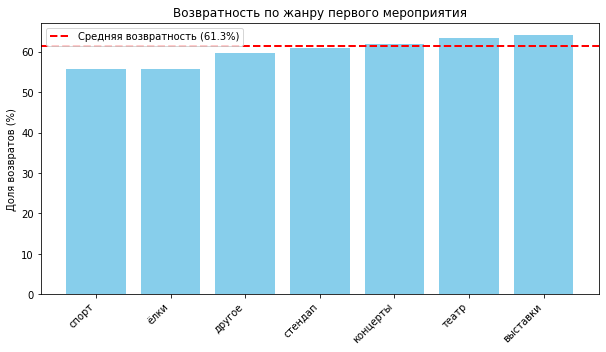

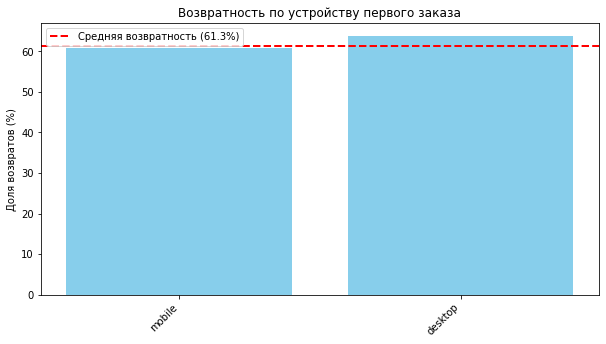

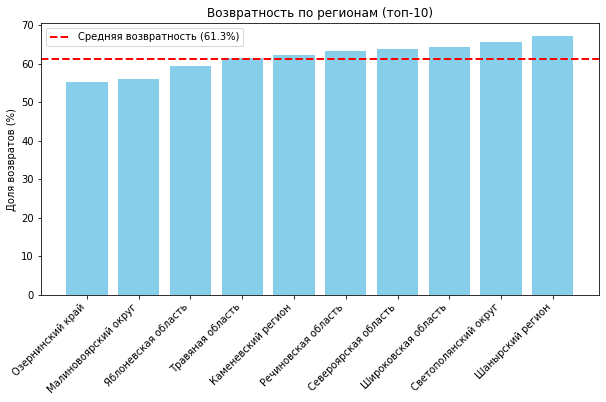

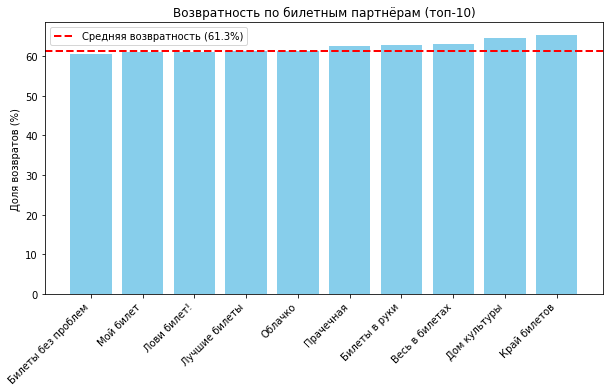

In [55]:
plot_return_rate(event_return, "Возвратность по жанру первого мероприятия")
plot_return_rate(device_return, "Возвратность по устройству первого заказа")
plot_return_rate(region_return_top10, "Возвратность по регионам (топ-10)")
plot_return_rate(service_return_top10, "Возвратность по билетным партнёрам (топ-10)")

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> На графики этого типа удобнее было бы добавить `axvline` (`axhline` для устройства, так как там гистограмма вертикальная) со средним уровнем возврата по выборке для более удобного анализа точек входа.

<div class="alert alert-info">


Поправила
</div>

**Вывод**

Средняя возвратность пользователей — около 61–62%.
По жанрам лучше среднего возвращаются пользователи, чей первый заказ был на выставки (~ 64%)  и театр  (~ 63%);   концерты (~ 62%) тоже немного выше среднего. Наименьшая возвратность у спорта и ёлок (≈56%).

По устройствам desktop-пользователи возвращаются чуть чаще (≈63.8%), чем те, кто впервые купил с mobile (≈60.8%).

По регионам и билетным партнёрам разброс возвратности есть, но значимые выводы стоит делать в первую очередь по крупным сегментам (топ-регионы и топ-партнёры), где доли выше среднего и достаточно много пользователей.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты правильно выделила общую среднюю возвратность и соотнесла её с результатами по сегментам. Вывод о том, что жанры с большим объёмом - театр и стендап - показывают возврат выше среднего, соответствует данным. Низкая возвратность у спорта, выставок и ёлок тоже подтверждается цифрами. Аккуратно отмечено, что мелкие сегменты по регионам и операторам дают нестабильные результаты - это важное замечание. Итог о более успешных точках входа сформулирован в целом корректно.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Во-первых, вывод по устройствам неверен. Ты написала, что мобильные пользователи демонстрируют более высокий уровень возврата. Однако таблица показывает обратное: desktop - 63.8%, а mobile - 60.8%. То есть именно десктоп удерживает пользователей лучше.

Во-вторых, ошибка в интерпретации жанров. Ты отнесла выставки к категории с низкой возвращаемостью. При этом данные говорят, что у выставок самый высокий процент возврата среди всех жанров - 64.0%, что даже выше, чем у театра. Это потенциально лучшая точка входа, которую ты упустила.

<div class="alert alert-info">


Поправила
</div>

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [39]:
#вычисляем возвратность в двух сегментах
sport_ret = event_return.loc["спорт", "returning_pct"]
concert_ret = event_return.loc["концерты", "returning_pct"]

sport_ret, concert_ret

(55.8, 61.8)

Возвратность:

Спорт: 55.8%

Концерты: 61.8%

**Вывод по Гипотеза 1:**

Гипотеза не подтверждается.
Возвратность пользователей заметно различается между сегментами:

у концертов — около 61.8%,

у спорта — около 55.8%.

Разница стабильная и значимая: пользователи, впервые пришедшие на концерты, возвращаются чаще, чем те, кто начинал со спортивных мероприятий. Это указывает, что жанр первого заказа влияет на последующую лояльность, и концерты являются более сильной точкой входа по сравнению со спортом.

In [40]:
#строим связь между сегментом и возвратностью
region_analysis = region_return.copy()
region_analysis[['users', 'returning_pct']].corr()

,users,returning_pct
users,1.000000,0.120076
returning_pct,0.120076,1.000000


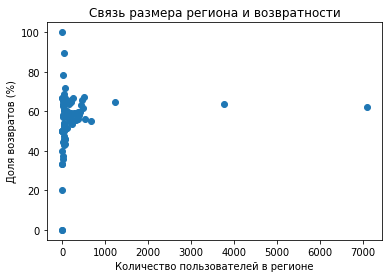

In [41]:
#визуализируем для удобства
plt.figure(figsize=(6, 4))
plt.scatter(region_analysis['users'], region_analysis['returning_pct'])
plt.xlabel("Количество пользователей в регионе")
plt.ylabel("Доля возвратов (%)")
plt.title("Связь размера региона и возвратности")
plt.show()

**Вывод по Гипотеза 2**

Гипотеза 2 не подтвердилась.
Корреляция между числом пользователей в регионе и возвратностью составляет всего 0.12, что говорит об отсутствии сколько-либо значимой связи.

На визуализации видно, что большинство регионов сильно «скучены» в узком диапазоне по численности пользователей, и при этом их возвратность находится примерно на одном уровне, близком к общей средней. Даже самые крупные регионы не демонстрируют повышенной возвратности — их показатели не выделяются на фоне остальных.

Итог: размер региона не влияет на вероятность повторного заказа; крупные регионы не формируют более лояльную аудиторию.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно сопоставила возвратность спорта и концертов: данные показывают более низкое значение у спорта и более высокое у концертов, и вывод по первой гипотезе соответствует фактам.
Вторая гипотеза тоже проверена корректно: рассчитана корреляция и построена визуализация, что полностью соответствует требованию задания. Формулировка о том, что крупные регионы не демонстрируют повышенную возвратность, отражает данные.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В выводе по гипотезе 1 можно чуть аккуратнее подчеркнуть, что разница между сегментами не просто есть, а стабильная и подтверждается значениями - спорт около 55.8, концерты около 61.8. Это усилило бы аргументацию.
        
Во второй гипотезе можно отметить, что слабая корреляция связана не только с отсутствием связи, но и с сильной скученностью регионов по численности пользователей - на графике видно, что большая часть точек лежит в очень узком диапазоне по оси количества пользователей, и это тоже влияет на интерпретацию.
        
Можно чуть уточнить формулировку про отсутствие зависимости. Корреляция действительно низкая, но полезно подчеркнуть, что даже самые крупные регионы находятся в диапазоне возвратности, близком к общей средней, что усиливает вывод.

<div class="alert alert-info">


Поправила
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [42]:
#разделим пользователей на 2 группы
one_order = user_profile_filtered[user_profile_filtered['is_two'] == 0]['avg_revenue_rub']
two_plus_orders = user_profile_filtered[user_profile_filtered['is_two'] == 1]['avg_revenue_rub']

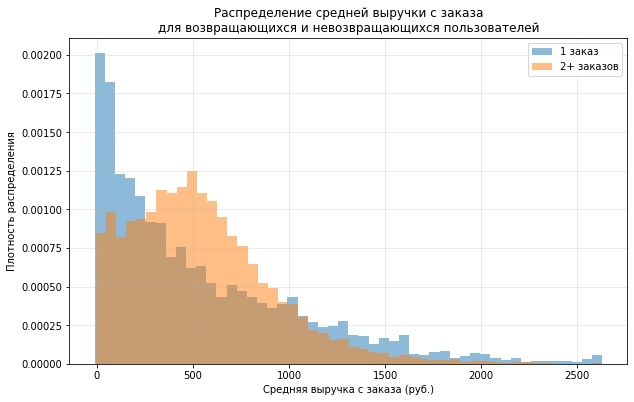

In [43]:
#построим сравнительные гистограммы
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bins = 50  # одинаковые интервалы

plt.hist(one_order, bins=bins, alpha=0.5, density=True, label='1 заказ')
plt.hist(two_plus_orders, bins=bins, alpha=0.5, density=True, label='2+ заказов')

plt.xlabel("Средняя выручка с заказа (руб.)")
plt.ylabel("Плотность распределения")
plt.title("Распределение средней выручки с заказа\nдля возвращающихся и невозвращающихся пользователей")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Вывод**


Распределения средней выручки с заказа у возвращающихся и невозвращающихся пользователей заметно различаются.

1. Пользователи с одним заказом (синий)

Основная масса заказов действительно сосредоточена в диапазоне 0–300 руб., что указывает на преобладание низких чеков.
При этом распределение имеет длинный хвост вправо, но таких заказов заметно меньше.

2. Пользователи, совершившие 2+ заказа (оранжевый)

Их распределение смещено вправо и более растянутое.
Наиболее плотная область — примерно 300–700 руб., однако хвост также тянется дальше, что говорит о разнообразии чеков внутри группы.

***Главное различие***

Возвращающиеся пользователи в среднем тратят больше, чем те, кто сделал единственный заказ.

Перекрытие распределений присутствует, но выражено неравномерно: высокие средние чеки куда чаще встречаются среди лояльных пользователей.

Пользователи с низким средним чеком гораздо реже возвращаются.

А пользователи с чеком 600+ руб. формируют существенную часть постоянной аудитории.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты корректно описала, что распределения двух групп заметно отличаются, и это действительно видно на графике. Основные диапазоны указаны верно: пользователи с одним заказом концентрируются в области низких чеков, а пользователи с несколькими заказами смещены правее. Сам вывод о том, что возвращающиеся пользователи тратят больше, полностью соответствует визуализации и сути задания.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Диапазон 0–300 руб для группы с одним заказом можно описать чуть осторожнее: эта зона действительно наиболее плотная, но хвост распределения уходит значительно дальше, и можно подчеркнуть, что основная масса, а не вся группа, сосредоточена в этой области.
        
Пик 300–700 руб для группы с несколькими заказами тоже выглядит корректно, но лучше отметить, что распределение более широкое, чем только указанный диапазон. Это улучшит точность интерпретации.
Можно добавить краткое упоминание, что перекрытие распределений есть, хотя и выражено неравномерно - это укрепит выводы.

<div class="alert alert-info">


Поправила
</div>

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [44]:
# разделим пользователей на две группы:
group_2_4 = user_profile_filtered[
    (user_profile_filtered['total_orders'] >= 2) &
    (user_profile_filtered['total_orders'] <= 4)
]['avg_revenue_rub']

group_5_plus = user_profile_filtered[
    user_profile_filtered['total_orders'] >= 5
]['avg_revenue_rub']

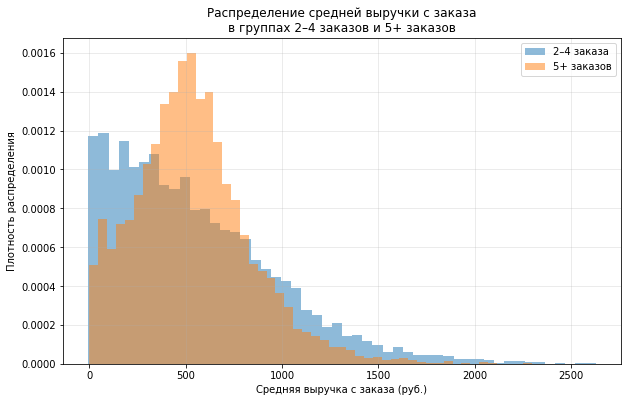

In [45]:
#построим сравнение распределений
plt.figure(figsize=(10, 6))

bins = 50

plt.hist(group_2_4, bins=bins, density=True, alpha=0.5, label='2–4 заказа')
plt.hist(group_5_plus, bins=bins, density=True, alpha=0.5, label='5+ заказов')

plt.xlabel("Средняя выручка с заказа (руб.)")
plt.ylabel("Плотность распределения")
plt.title("Распределение средней выручки с заказа\nв группах 2–4 заказов и 5+ заказов")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Вывод:** 


Да, различия между группами выраженные. Пользователи, совершающие 5 и более заказов, имеют более высокую среднюю выручку с заказа по сравнению с теми, кто делает 2–4 заказа.

У группы 5+ заказов распределение смещено правее:

концентрация значений чаще приходится на средние и высокие чеки,

правая часть распределения шире и плотнее, что указывает на большее количество крупных покупок.

Хотя распределения частично перекрываются, активные пользователи значительно чаще совершают заказы с повышенным средним чеком.

Это подтверждает гипотезу: чем больше заказов делает пользователь, тем выше его склонность тратить больше, что отражает более высокую вовлечённость и ценность таких пользователей для сервиса.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты правильно уловила общий сдвиг распределений: у группы с 5+ заказами кривая действительно смещена правее, и основной объём значений у них выше, чем у пользователей с 2–4 заказами. Логика о том, что более активные пользователи обычно имеют более высокий средний чек, соответствует тому, что видно на графике. Задание выполнено: сравнение групп сделано, на вопрос дана прямая и корректная по смыслу интерпретация.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В тексте можно чуть точнее обозначить, что различия проявляются в виде более выраженной концентрации второй группы в диапазоне примерно от среднего уровня и выше. На графике есть заметное перекрытие распределений, зато второй сегмент имеет более широкую правую часть; акцент на этом сделает вывод более точным.
        
Также можно упомянуть, что разница не только в медиане или пике, но и в форме хвоста: у группы 5+ заказов хвост длиннее и плотнее, что дополнительно подтверждает более высокие значения среднего чека.

<div class="alert alert-info">


Поправила
</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

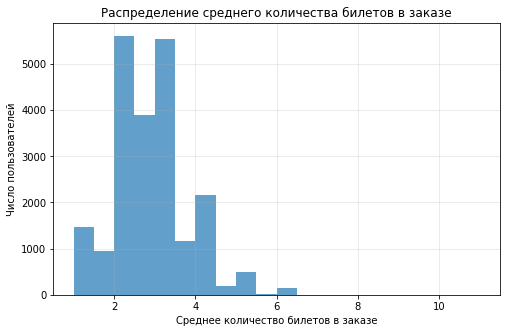

In [46]:
#построим гистограмму
plt.figure(figsize=(8,5))
plt.hist(user_profile_filtered['avg_tickets'], bins=20, alpha=0.7)
plt.xlabel("Среднее количество билетов в заказе")
plt.ylabel("Число пользователей")
plt.title("Распределение среднего количества билетов в заказе")
plt.grid(alpha=0.3)
plt.show()

In [47]:
#разделим пользователей на сегменты
user_profile_filtered = user_profile_filtered.copy()

def ticket_segment(x):
    if x < 2:
        return "1–2 билета"
    elif x < 3:
        return "2–3 билета"
    elif x < 5:
        return "3–5 билетов"
    else:
        return "5+ билетов"

user_profile_filtered["ticket_seg"] = user_profile_filtered["avg_tickets"].apply(ticket_segment)


In [48]:
#рассчитаем пользователей и возвратность по сегментам
ticket_stats = (
    user_profile_filtered
    .groupby("ticket_seg")
    .agg(
        users=("is_two", "count"),    # просто считаем строки
        returning=("is_two", "mean")  # доля вернувшихся
    )
    .reset_index()
)

ticket_stats["returning_pct"] = (ticket_stats["returning"] * 100).round(2)

ticket_stats


,ticket_seg,users,returning,returning_pct
0,1–2 билета,2419,0.513022,51.30
1,2–3 билета,9498,0.735839,73.58
2,3–5 билетов,9060,0.542605,54.26
3,5+ билетов,661,0.187595,18.76


**Вывод:**
    Распределение пользователей по сегментам среднего количества билетов ***неравномерное***: основная часть находится в диапазоне 2–4 билета, что подтверждается формой гистограммы и размером сегментов. Сегменты 1–2 билета и особенно 5+ билетов значительно меньше по численности.

Возвратность заметно отличается между группами. Пользователи, покупающие в среднем 2–3 билета, демонстрируют наиболее высокую и устойчивую долю повторных заказов — это наиболее лояльный сегмент. Сегмент 5+ билетов, напротив, показывает существенно более низкую возвратность; при этом он маленький по размеру, и такие заказы чаще являются разовыми групповыми покупками, что объясняет слабое удержание.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты корректно выполнила требования задания: сегменты созданы, распределение пользователей рассмотрено, доли возвратов посчитаны. Выводы о неравномерности распределения и различиях в возвратности в целом соответствуют данным. Хорошо, что ты отдельно выделила сегмент с высокой долей возвратов и сегмент с низкой - именно этого и ждала задача.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В формулировке про аномально высокую возвратность сегмента 2–3 билета можно чуть смягчить акцент: значение действительно заметно выше остальных, но оно не выходит за рамки ожидаемого поведения, поэтому слово «аномально» может быть излишним.
        
Также можешь уточнить, что сегмент 5+ билетов маленький по размеру (661 пользователь), и низкая возвратность в таких маленьких группах может быть менее стабильной. Это усилит аргументацию и будет более аккуратно с точки зрения интерпретации.
        
Гистограмма показывает, что пользователи концентрируются примерно в диапазоне 2–4 билета, и можно прямо связать это наблюдение с сегментами - это добавит структурности выводу.

<div class="alert alert-info">


Поправила
</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [49]:
#определяем день недели первой покупки
user_profile_filtered["first_order_weekday"] = (
    user_profile_filtered["first_order_dt"].dt.day_name()
)

In [50]:
#собираем статистику по неделям
weekday_stats = (
    user_profile_filtered
    .groupby("first_order_weekday")
    .agg(
        users=("is_two", "count"),
        returning=("is_two", "mean")
    )
    .reset_index()
)

weekday_stats["returning_pct"] = (weekday_stats["returning"] * 100).round(2)
weekday_stats

,first_order_weekday,users,returning,returning_pct
0,Friday,3259,0.598343,59.83
1,Monday,2930,0.630375,63.04
2,Saturday,3326,0.628082,62.81
3,Sunday,2777,0.600288,60.03
4,Thursday,3113,0.594282,59.43
5,Tuesday,3176,0.619018,61.90
6,Wednesday,3057,0.621851,62.19


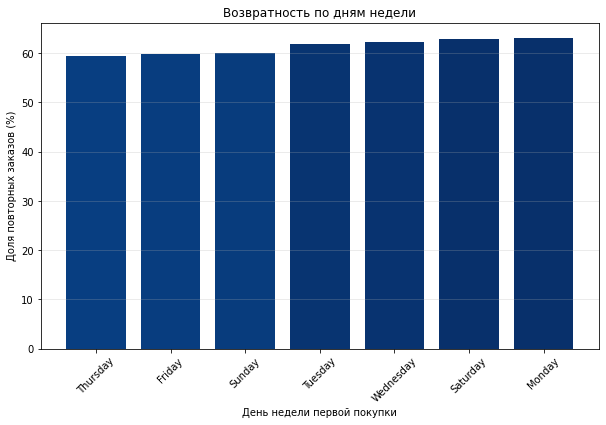

In [51]:
#визуализируем
weekday_stats_sorted = weekday_stats.sort_values("returning_pct")

plt.figure(figsize=(10, 6))
bars = plt.bar(
    weekday_stats_sorted["first_order_weekday"],
    weekday_stats_sorted["returning_pct"],
    color=plt.cm.Blues(weekday_stats_sorted["returning_pct"] / weekday_stats_sorted["returning_pct"].max())
)

plt.ylabel("Доля повторных заказов (%)")
plt.xlabel("День недели первой покупки")
plt.title("Возвратность по дням недели")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

**Вывод:**


Распределение возвратности по дням недели показывает небольшие, но заметные колебания: разница между минимальным уровнем возврата (около 59.4% в четверг) и максимальным (около 63.0% в субботу и понедельник) составляет несколько процентных пунктов.

Хотя некоторые дни — например, понедельник и суббота — демонстрируют чуть более высокую долю повторных покупок, различия не выглядят устойчивыми или системными. Общий уровень возвратности остаётся близким к среднему по выборке.

Итог: ***день недели первой покупки не является значимым фактором удержания***, и его влияние на возвратность скорее второстепенное.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты корректно выполнила требования задания: выделила день недели, посчитала долю возвратов и дала прямой ответ на вопрос. Общая логика выводов - что различия между днями недели умеренные и не создают выраженной зависимости - соответствует тому, что видно в таблице. Тон вывода аккуратный и не делает чрезмерных обобщений.
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Разброс возвратности между днями всё же не совсем незначительный. Например, разница между минимальным значением около 59.4 и максимальным около 63.0 составляет несколько процентных пунктов. Это немного, но можно уточнить, что различия есть, хотя и не выглядят критичными.
        
Также можно отметить, что понедельник и суббота находятся в верхней части диапазона, а четверг - в нижней. Это поможет показать, что ты опираешься на конкретные наблюдения, а не только на общий тренд.
Фраза про отсутствие существенного фактора звучит корректно, но можно добавить, что эффект не выглядит устойчивым или системным - это усилит аргументацию.

<div class="alert alert-info">


Поправила
</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [52]:
#разделим пользователей на 2 группы
group_2_4 = user_profile_filtered[
    (user_profile_filtered["total_orders"] >= 2) &
    (user_profile_filtered["total_orders"] <= 4)
]["avg_days_between_orders"].dropna()

group_5_plus = user_profile_filtered[
    user_profile_filtered["total_orders"] >= 5
]["avg_days_between_orders"].dropna()

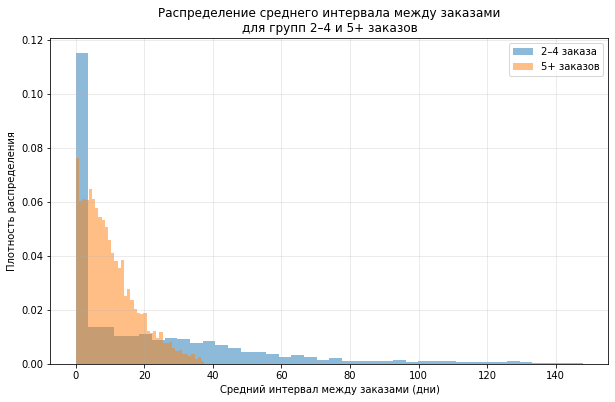

In [53]:
#построим сравнение распределений
plt.figure(figsize=(10,6))

bins = 40

plt.hist(group_2_4, bins=bins, density=True, alpha=0.5, label="2–4 заказа")
plt.hist(group_5_plus, bins=bins, density=True, alpha=0.5, label="5+ заказов")

plt.xlabel("Средний интервал между заказами (дни)")
plt.ylabel("Плотность распределения")
plt.title("Распределение среднего интервала между заказами\nдля групп 2–4 и 5+ заказов")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [54]:
#посчитаем основные статистики
print("Средний интервал 2–4 заказа:", group_2_4.mean())
print("Медиана 2–4:", group_2_4.median())

print("Средний интервал 5+ заказов:", group_5_plus.mean())
print("Медиана 5+:", group_5_plus.median())

Средний интервал 2–4 заказа: 21.329939
Медиана 2–4: 9.0
Средний интервал 5+ заказов: 9.900063
Медиана 5+: 8.117647


**Вывод:**

    
   Пользователи, совершающие 5 и более заказов, покупают заметно чаще: их средний интервал между покупками — около 10 дней, тогда как у пользователей с 2–4 заказами — около 21 дня. Однако медианы у групп почти одинаковые — около 8–9 дней, что показывает: основная масса пользователей покупает с похожей частотой, а различия формируются за счёт длинных пауз у менее активных пользователей.

Распределение подтверждает это: у группы 2–4 заказов встречается значительно больше длинных интервалов, тогда как у активных пользователей (5+) хвост распределения короче и плотнее.

Итог: короткие интервалы между покупками — характерная черта наиболее вовлечённых пользователей, а длинные паузы являются ключевым фактором снижения активности.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно сопоставила средние интервалы между группами: значения действительно показывают, что пользователи с 5+ заказами покупают чаще. График подтверждает, что их распределение сильнее сосредоточено в области коротких интервалов. Логика про связь коротких интервалов с устойчивым удержанием соответствует ожидаемому поведению в продуктовой аналитике. Задание выполнено полностью - сравнение групп проведено, выводы сформулированы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Средние значения у обеих групп довольно чувствительны к длинным хвостам на графике. Можно упомянуть, что медианы у групп очень близки (около 9 дней), и это важное уточнение: различие видно скорее в хвостах, чем в центральной массе. Такое замечание сделает вывод более точным и аккуратным.
        
Также распределение группы 2–4 заказов выглядит более растянутым, особенно в длинных интервалах, и можно коротко подчеркнуть, что именно высокая доля пользователей с длинными паузами создаёт разрыв среднего. Это усилит связку между визуализацией и текстом.

<div class="alert alert-info">


Поправила
</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

<div class="alert alert-info">


Унесла наверх
</div>

In [65]:
#рассчитаем phi_k для всего датасета

interval_cols = [
    "avg_revenue_rub",
    "avg_tickets",
    "avg_days_between_orders",
    "total_orders"
]

phik_matrix_full = user_profile_filtered.phik_matrix(interval_cols=interval_cols)

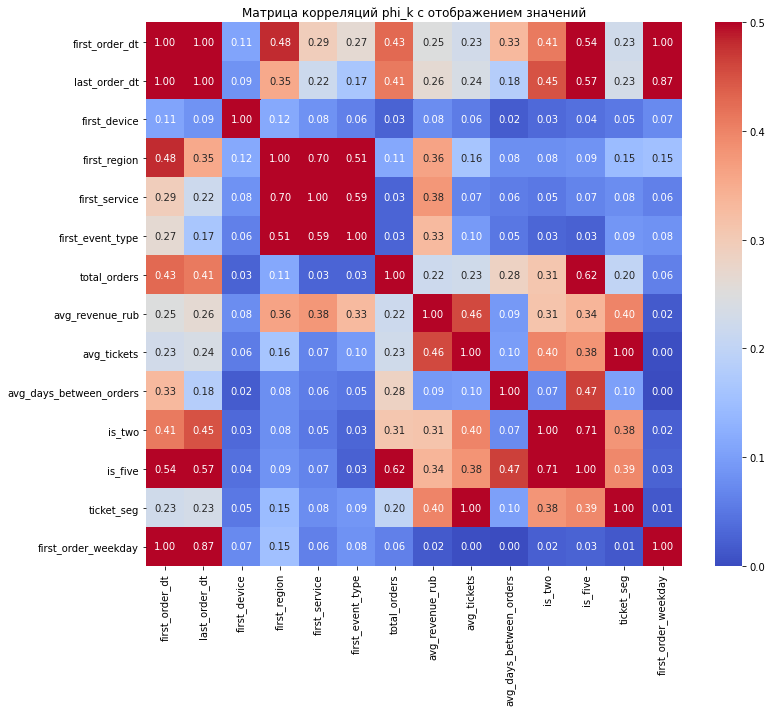

In [58]:
#визуализируем
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    phik_matrix_full,
    cmap="coolwarm",
    annot=True,      # включаем подписи
    fmt=".2f",        # формат чисел (2 знака после запятой)
    vmin=0,
    vmax=0.5
)
plt.title("Матрица корреляций phi_k с отображением значений")
plt.show()

**Вывод:**
    Количество заказов пользователя в наибольшей степени связано с его поведенческими характеристиками, а не с параметрами первого заказа. Наиболее заметные корреляции наблюдаются у следующих признаков:

avg_days_between_orders (≈0.28) — чем короче интервалы между покупками, тем выше общее число заказов;

avg_tickets (≈0.23) — пользователи, покупающие больше билетов, как правило, проявляют более высокую вовлечённость;

avg_revenue_rub (≈0.22) — более высокий средний чек также связан с большей активностью.

Хотя связи невысоки по абсолютному значению, именно их относительные различия показывают, что частота покупок, размер заказа и средний чек — наиболее значимые факторы.

Категориальные признаки первого заказа (жанр, устройство, регион, билетный оператор) имеют слабое влияние — однако небольшие закономерности всё же прослеживаются, например, по некоторым жанрам и регионам (корреляции порядка 0.10–0.15).

Очень высокая корреляция между total_orders и бинарными признаками is_two и is_five является техническим эффектом методики расчёта: эти признаки напрямую зависят от количества заказов и потому не несут аналитической ценности.

**Итог**

Ключевыми предикторами числа заказов оказываются частота покупок, размер покупки и средний чек — то есть именно поведение пользователя после первого заказа, а не характеристики его первой покупки.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты правильно выделила, что самые заметные связи идут от поведенческих признаков, а не от параметров первого заказа. Коэффициенты действительно выше у средних интервалов между заказами, среднего количества билетов и среднего чека. Ты корректно сформулировала итог о том, что количество заказов связано прежде всего с поведением пользователя после первого взаимодействия. Задание выполнено: и анализ сделан, и тепловая карта визуализирована, и вывод на вопрос дан.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Связи у avg_days_between_orders и avg_tickets немного выше, чем у avg_revenue_rub, и можно подчеркнуть, что при их сравнительно малых значениях важнее не сами числа, а относительная разница между ними.
Можно также отметить, что часть связей с параметрами первого заказа хоть и слабые, но кое-какие закономерности всё же заметны - например, слабое влияние жанра и региона, что видно на уровне около 0.1–0.15. Добавление этой детали сделает вывод чуть более сбалансированным.
        
Ещё можно уточнить, что очень высокая корреляция между total_orders и бинарными признаками is_two и is_five - ожидаемый технический эффект из-за того, как эти признаки определены, а не реальная смысловая взаимосвязь.

<div class="alert alert-info">


Поправила
</div>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

**Информация о данных**

В анализе использовались данные заказов Яндекс Афиши за 2024 год: исходно 290 611 заказов, после фильтрации выбросов по выручке объём сократился примерно на 0,97%. Заказы в тенге (KZT) были приведены к рублям по ежедневному курсу из отдельного датасета, для чего были добавлены технические столбцы order_date, nominal, curs, cdx и рассчитан ключевой показатель revenue_rub. Из revenue_rub были удалены отрицательные значения и значения выше 99-го перцентиля (2628 ₽), а из пользовательского профиля — аномальные наблюдения с total_orders выше 99-го перцентиля (152 заказа), что затронуло около 0,99% пользователей. В результате сформирован итоговый профиль примерно из 21,6 тыс. пользователей с агрегированными признаками по заказам и поведению.

**Основные результаты анализа.**

***Аудитория и активность***

В анализ включено ~21,6 тыс. пользователей.
Медианное число заказов — 2; 61,7% совершили повторную покупку; 29% сделали 5+ заказов.
Большинство — пользователи с 1–4 заказами; «суперактивные» составляют небольшую долю.

***Первый заказ и возвратность***

Основные точки входа:

жанры: доминируют концерты (≈44%), затем «другое» и театр;

устройства: mobile ≈83%;

регионы: несколько крупных регионов дают значительную часть первых заказов;

партнёры: около 70% приходятся на 4–5 крупнейших билетооператоров.

Различия по возвратности между сегментами умеренные.
Гипотезы не подтвердились:

спорт не возвратнее концертов (возвратность ниже: ~55.8% против ~61.8%);

крупные регионы не показывают большей лояльности — корреляция пользователей и возвратности всего 0.12, а показатели возвратности крупных регионов близки к средним.

***Чек, билеты и повторные покупки***

Пользователи с одним заказом имеют низкую среднюю выручку (основная масса — 0–300 ₽).
Вернувшиеся пользователи тратят больше, а у сегмента 5+ заказов средний чек выше, чем у 2–4 заказов.
При этом медианы двух групп близки (~9 рублей), и разница формируется главным образом за счёт длинных хвостов в группе 2–4 заказов.

По среднему числу билетов:

наиболее возвратные — 2–3 билета (≈74%), сегмент большой и устойчивый;

сегмент 5+ билетов — маленький (≈660 пользователей), возвратность низкая (≈19%), что объясняется вероятностью разовых групповых покупок.

***Время и удержание***

День недели первой покупки оказывает слабое влияние: возвратность колеблется в диапазоне 59–63%, различия есть, но не системные.

Средний интервал между заказами важнее:

у группы 2–4 заказов — ~21 день,

у группы 5+ заказов — ~10 дней.

Медианы почти одинаковы (~8–9 дней), что говорит о схожем типичном поведении, а различия возникают за счёт большего числа длинных пауз у менее активных пользователей.

***Корреляционный анализ***

Наиболее связаны с количеством заказов поведенческие признаки:

avg_days_between_orders (≈0.28) — короче интервалы → больше заказов;

avg_tickets (≈0.23) — больше билетов → выше вовлечённость;

avg_revenue_rub (≈0.22) — высокий средний чек связан с большей активностью.

Категориальные признаки первого заказа дают слабые связи (порядка 0.1–0.15) и почти не влияют на будущую активность.
Очень высокая корреляция is_two и is_five ожидаема, так как эти признаки технически зависят от total_orders.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты последовательно охватила практически все блоки, которые требовалось включить: рассказала о фильтрации данных, описала структуру выборки, основные точки входа, возвратность, особенности поведения разных сегментов, чек, количество билетов, интервалы между покупками и результаты корреляционного анализа.
    
Объяснение поведенческих факторов - сильная часть текста. Оно точно отражает выводы предыдущих задач. Отдельно хорошо, что ты подчеркнула слабую связь между параметрами первого заказа и будущей активностью - это полностью соответствует анализу корреляций и проверенным гипотезам.
    
Структура логична: сначала данные, потом ключевые наблюдения по разным направлениям, затем поведение и удержание, а далее - корреляции. Такой порядок читается естественно и отражает ход исследования.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В разделе про чек и повторные покупки можно чуть аккуратнее обозначить разницу между группами 2–4 заказов и 5+ заказов, ведь медианы у них довольно близки, а различия в среднем значении тянутся за счёт длинных хвостов. Сейчас формулировка делает отличие более резким, чем оно проявляется в данных.
        
Когда говоришь о количестве билетов, можно уточнить, что высокая возвращаемость сегмента 2–3 билета связана с его большим размером и устойчивостью, а низкая - у 5+ билетов - дополнительно объясняется небольшой численностью сегмента. Это подчеркнёт качественный характер интерпретации.
        
Раздел про временные характеристики можно немного расширить, упомянув, что различия по дням недели существуют, но не носят системного характера. Сейчас мысль сформулирована верно, но её можно сделать немного конкретнее.

<div class="alert alert-info">


Поправила
</div>

# Рекомендации заказчику


`Сделать ставку на поведенческие метрики в модели прогнозирования и маркетинге`

 - Использовать средний чек, среднее число билетов и средний интервал между покупками как ключевые предикторы лояльности.

 - Выделять пользователей с растущим чеком и 2–3 билетами в заказе — это ядро лояльной и устойчивой аудитории. Сегмент велик по размеру и надёжен, но его не стоит рассматривать как универсальную основу всей клиентской базы.

`Работа с частотой покупок (удержание)`

 - Настроить триггерные коммуникации (email, push, ремаркетинг), если пользователь не покупал дольше типичного интервала (например, >20–25 дней).

 - Предлагать персональные промокоды/подборки мероприятий, чтобы сокращать паузы между заказами.

`Сегменты по составу заказа`

 - Сегмент 2–3 билета — наиболее перспективный: высокий уровень возвратов и значительный размер. Стоит инвестировать в персональные предложения и программы лояльности.

 - Сегмент 5+ билетов — низкая возвратность; это кандидаты на отдельные активности: спецпредложения для корпоративов, групповые акции, напоминания перед повторением «сезонных» событий.

`Усиление успешных точек входа`

 - Концерты и театр — хорошие входные жанры: с них приходит много пользователей, и они демонстрируют хорошую возвратность.

 - Имеет смысл усиливать промо по этим категориям (главная страница, подборки, персональные рекомендации), особенно для новых пользователей.

`Фокус на мобильный канал`

 - Так как ≈83% первых заказов приходится на mobile, мобильное приложение и мобильная версия сайта должны оставаться основным приоритетом: удобный поиск, быстрый checkout, сохранённые карты/кошельки. При этом важно учитывать, что мобильные пользователи показывают немного более низкую возвратность, чем desktop. Это не отменяет приоритета мобильного канала, но помогает сформировать реалистичные ожидания от его эффективности.

`Партнёрства и региональное развитие`

 - Основной поток пользователей обеспечивают несколько крупных операторов и несколько регионов. Для них стоит:

   - развивать совместные акции и кросс-промо;

   - использовать их как плацдарм для тестирования новых механизмов удержания.

 - Для «длинного хвоста» партнёров важно особенно тщательно считать ROI, так как малые операторы дают небольшой вклад и их эффективность сильно зависит от размера выборки.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты чётко опираешься на ключевые находки анализа:
    
• правильный акцент на поведенческих метриках - это полностью подтверждается корреляционным анализом, где именно они дают максимальные связи;
    
• работа с частотой покупок логично вытекает из разницы интервалов между заказами (10 дней vs 21 день);
    
• выделение сегмента 2–3 билета как перспективного - корректно, он и крупный, и самый возвратный;
    
• осторожный подход к сегменту 5+ билетов тоже полностью совпадает с данными - низкая возвратность и признаки разовых групповых покупок;
    
• упор на концерты и театр как успешные входные жанры соответствует распределению пользовательских входов;
    
• фокус на мобайл подтверждён долей first_device и тем, что мобильные - основной канал первой покупки;
    
• рекомендации по партнёрствам опираются на реальную концентрацию пользователей у нескольких крупных операторов.

Логика последовательная, рекомендации связаны с аналитикой и сформулированы понятно.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Некоторые формулировки можно сделать чуть аккуратнее:
        
• В части про рост среднего чека в 2–3 билета стоит подчеркнуть, что этот сегмент не только лояльный, но и устойчивый - размер сегмента действительно большой, но не стоит делать из него универсальную основу всей аудитории.
        
• В блоке про мобильный канал можно добавить, что мобильные пользователи показывают немного более низкую возвратность, чем десктоп. Это не меняет приоритет канала, но помогает избежать чрезмерно оптимистичного ожидания.
        
• В рекомендациях по партнёрам можно уточнить, что малые операторы дают низкий вклад, поэтому для них действительно важно считать ROI точечно - это есть в тексте, но можно чуть сильнее связать с «длинным хвостом».

<div class="alert alert-info">


Поправила
</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Ссылки на `GitHub` нет - пришли, пожалуйста, на следующую итерацию.

<div class="alert alert-info">
    
https://github.com/Korzyukova/afisha-loyalty-analysis

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Татьяна, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)